<a href="https://colab.research.google.com/github/Droganderon/Colab/blob/main/Lab%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабораторная работа №3 "Ансамбли моделей на примере решающих деревьев"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**1.** Разбить выборку на две части (train, test)

In [3]:
a = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True).to_numpy()
b = pd.get_dummies(df['ChestPainType']).to_numpy()
c = pd.get_dummies(df['Sex']).to_numpy()
d = pd.get_dummies(df['RestingECG']).to_numpy()
e = pd.get_dummies(df['ExerciseAngina']).to_numpy()
f = pd.get_dummies(df['ST_Slope']).to_numpy()
df['ChestPainType'] = b.argmax(1)
df['Sex'] = c.argmax(1)
df['RestingECG'] = d.argmax(1)
df['ExerciseAngina'] = e.argmax(1)
df['ST_Slope'] = f.argmax(1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [4]:
from sklearn.model_selection import train_test_split
Y = df.pop('HeartDisease')
X_train, X_test, Y_train, Y_test= train_test_split(df, Y, train_size=0.75, test_size=0.25, stratify=Y, random_state=123)
X_train, Y

(     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
 496   58    1              0        132          458          1           1   
 769   51    0              2        130          256          0           0   
 614   62    1              1        120          254          0           0   
 798   42    0              0        102          265          0           0   
 67    32    1              1        110          225          0           1   
 ..   ...  ...            ...        ...          ...        ...         ...   
 405   35    1              0        120            0          1           1   
 177   59    1              1        140          287          0           1   
 192   48    1              1        130          245          0           1   
 406   57    1              0        140            0          1           1   
 695   58    1              0        146          218          0           1   
 
      MaxHR  ExerciseAngina  Oldpeak  

**2.** С помощью простого решающего дерева (см. класс sklearn.tree.DecisionTreeClassifier()). Обучить модель, не задавая ограничения на глубину решающего дерева, оценить точность обучения и тестирования (здесь в качестве точности использовать долю верных ответов). Сравнить точность на обучающей и тестовой выборке, что можно сказать о модели?

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [22]:
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

score_acc_train = accuracy_score(Y_train, Y_pred_train)
score_acc_test = accuracy_score(Y_test, Y_pred_test)

score_acc_train, score_acc_test

(1.0, 0.8043478260869565)

In [21]:
score_preci_test = precision_score(Y_test, Y_pred_test)
score_recall_test = recall_score(Y_test, Y_pred_test)
score_f1_test = f1_score(Y_test, Y_pred_test)

score_preci_test, score_recall_test, score_f1_test

(0.8360655737704918, 0.8031496062992126, 0.8192771084337349)

**3.** C помощью класса sklearn.model_selection.GridSearchCV() выполнить оптимизацию решающего дерева по гиперпараметрам: 
* 'max_depth': [3,4,5,6,7,8,9,10,None],
* 'max_features':  ['auto', 'log2', None], 
* 'min_samples_leaf': range(1,10), 
* 'min_samples_split': range(2, 10), 
* 'criterion': ['gini', 'entropy']  
Гиперпараметры можно представить в виде словаря и передать их в качестве параметра param_grid при создании экземпляра класса GridSearchCV(). В качестве scoring задать 'accuracy', количество фолдов задать равным 5.

In [ ]:
from sklearn.model_selection import GridSearchCV

list_param = {'max_depth': [3,4,5,6,7,8,9,10,None], 'max_features': ['auto', 'log2', None], 'min_samples_leaf': range(1,10), 'min_samples_split': range(2, 10), 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(clf, list_param, scoring='accuracy', cv=5)
logreg_cv = grid.fit(X_train, Y_train)

In [24]:
logreg_cv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

**3.1** Вывести оптимальные параметры модели и ее точность (смотрите среди перечня атрубутов класса)

In [25]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [26]:
grid.best_score_

0.864889453083677

**4.** Обучите новое дерево, задавая оптимальные параметры, полученные в п.3. Оцените точность на обучающей и тестовой выборкой, сравните их с точностью первой модели. Как изменилось качество модели?

In [27]:
clf_new = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=4)
clf_2 = clf_new.fit(X_train, Y_train)


In [28]:
Y_pred_new_train = clf_2.predict(X_train)
Y_pred_new_test = clf_2.predict(X_test)

score_new_acc_train = accuracy_score(Y_train, Y_pred_new_train)
score_new_acc_test = accuracy_score(Y_test, Y_pred_new_test)

score_new_acc_train, score_new_acc_test

(0.8880813953488372, 0.8347826086956521)

In [29]:
score_new_preci_test = precision_score(Y_test, Y_pred_new_test)
score_new_recall_test = recall_score(Y_test, Y_pred_new_test)
score_new_f1_test = f1_score(Y_test, Y_pred_new_test)

score_new_preci_test, score_new_recall_test, score_new_f1_test

(0.8677685950413223, 0.8267716535433071, 0.8467741935483871)

**5.** Визуализируйте полученное дерево решений 

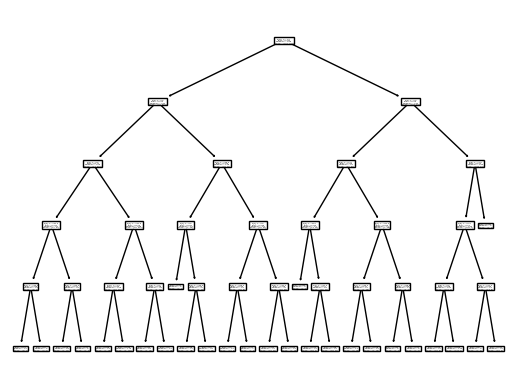

In [30]:
from sklearn.tree import plot_tree
Tree_decision = plot_tree(clf_2)

**7.** Рассчитайте значение roc_auc_score

In [33]:
from sklearn.metrics import roc_auc_score
pred_prob = clf_new.predict_proba(X_test)
auc_score = roc_auc_score(Y_test, pred_prob[:,1])
auc_score

0.8644216802996713

**8.** Определите важность признаков.

In [34]:
importance = clf_new.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04074
Feature: 2, Score: 0.15795
Feature: 3, Score: 0.03405
Feature: 4, Score: 0.03429
Feature: 5, Score: 0.00789
Feature: 6, Score: 0.00221
Feature: 7, Score: 0.09946
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.07645
Feature: 10, Score: 0.54697


In [35]:
feature_importances = (clf_new.feature_importances_ / sum(clf_new.feature_importances_))
feature_importances.sort()
feature_importances

array([0.        , 0.        , 0.00220512, 0.00788668, 0.03405072,
       0.0342937 , 0.04073984, 0.07644691, 0.09945984, 0.1579459 ,
       0.54697128])

**8.** На основе процедуры бэггинга обучить композицию решающих деревьев, провести оптимизацию модели по гиперпараметру - кол-во деревьев в ансамбле. Использовать классы BaggingClassifier() и GridSearchCV(). Определить оптимальное кол-во деревьев и оценить точность модели.

In [36]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
list_param_new = {'max_features': range(1, 10)}
grid_2 = GridSearchCV(bag_model, list_param_new, scoring='accuracy', cv=5)
logreg_cv_2 = grid_2.fit(X_train, Y_train)

In [43]:
logreg_cv_2

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_samples=0.8, n_estimators=100,
                                         oob_score=True, random_state=0),
             param_grid={'max_features': range(1, 10)}, scoring='accuracy')

In [44]:
grid_2.best_params_

{'max_features': 6}

In [45]:
grid_2.best_score_

0.8779540886491061

In [48]:
clf_bagging = DecisionTreeClassifier(max_features=6)
clf_3 = clf_bagging.fit(X_train, Y_train)

In [49]:
Y_pred_bagging_train = clf_3.predict(X_train)
Y_pred_bagging_test = clf_3.predict(X_test)

score_bagging_acc_train = accuracy_score(Y_train, Y_pred_bagging_train)
score_bagging_acc_test = accuracy_score(Y_test, Y_pred_bagging_test)

score_bagging_acc_train, score_bagging_acc_test

(1.0, 0.7782608695652173)

In [50]:
score_bagging_preci_test = precision_score(Y_test, Y_pred_bagging_test)
score_bagging_recall_test = recall_score(Y_test, Y_pred_bagging_test)
score_bagging_f1_test = f1_score(Y_test, Y_pred_bagging_test)

score_bagging_preci_test, score_bagging_recall_test, score_bagging_f1_test

(0.8220338983050848, 0.7637795275590551, 0.7918367346938775)

**9.** Построить ансамбль решающих деревьев в виде случайного леса (см. класс sklearn.ensemble.RandomForestClassifier()), провести оптимизацию модели по гиперпараметрам: 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'bootstrap'

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier()

list_param_forest = {'max_depth': [5,8,10,None], 'n_estimators': [10,25], 'min_samples_leaf': range(2,6,2), 'min_samples_split': range(2, 6, 2), 'bootstrap': [True, False]}
grid_param_forest = GridSearchCV(clf_forest, list_param_forest, scoring='accuracy', cv=5)
logreg_cv_3 = grid_param_forest.fit(X_train, Y_train)

In [52]:
grid_param_forest.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 25}

In [53]:
grid_param_forest.best_score_

0.8794350999682641

In [55]:
clf_forest_opt = RandomForestClassifier(bootstrap=False, max_depth=None, n_estimators=25, min_samples_leaf=4, min_samples_split=4)
clf_4 = clf_new.fit(X_train, Y_train)

In [56]:
Y_pred_forest_train = clf_4.predict(X_train)
Y_pred_forest_test = clf_4.predict(X_test)

score_forest_acc_train = accuracy_score(Y_train, Y_pred_forest_train)
score_forest_acc_test = accuracy_score(Y_test, Y_pred_forest_test)

score_forest_acc_train, score_forest_acc_test

(0.8880813953488372, 0.8347826086956521)

In [57]:
score_forest_preci_test = precision_score(Y_test, Y_pred_forest_test)
score_forest_recall_test = recall_score(Y_test, Y_pred_forest_test)
score_forest_f1_test = f1_score(Y_test, Y_pred_forest_test)

score_forest_preci_test, score_forest_recall_test, score_forest_f1_test

(0.8739495798319328, 0.8188976377952756, 0.8455284552845529)

**10.** Для всех моделей рассчитать метрики качества (accuracy, precision, recall, F1-score) на тестовой выборке. результат представить в виде датафрейма (например явняе индексы строк - вид модели, столбцы - вид метрики)

In [ ]:


def score(y, y_pred):
    return 
  


,Accuracy,Precision,Recall,F1 score
Decision tree,0.834783,0.856000,0.84252,0.849206
Bagging,0.821739,0.898148,0.76378,0.825532
Random forest,0.834783,0.829630,0.88189,0.854962
